# MOwNiT – Układy równań liniowych - metody iteracyjne

__Przygotował:__
__Szymon Budziak__

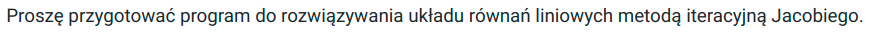

In [1]:
import numpy as np
import pandas as pd
from time import perf_counter

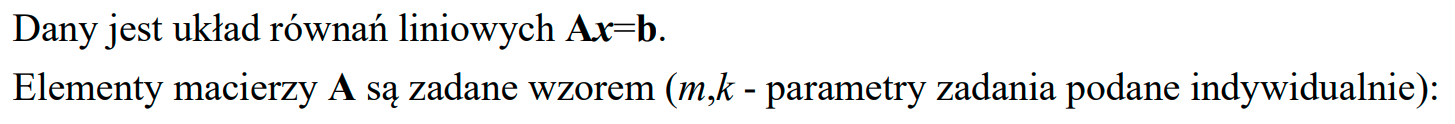

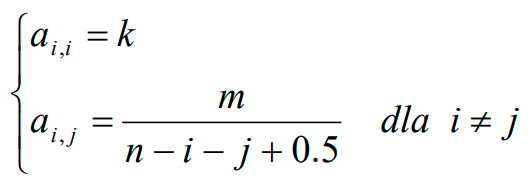

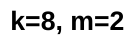

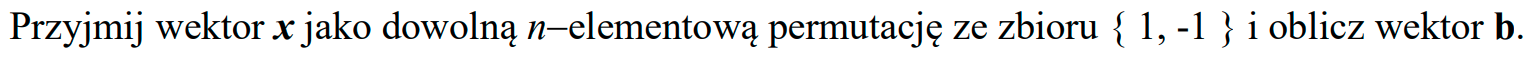

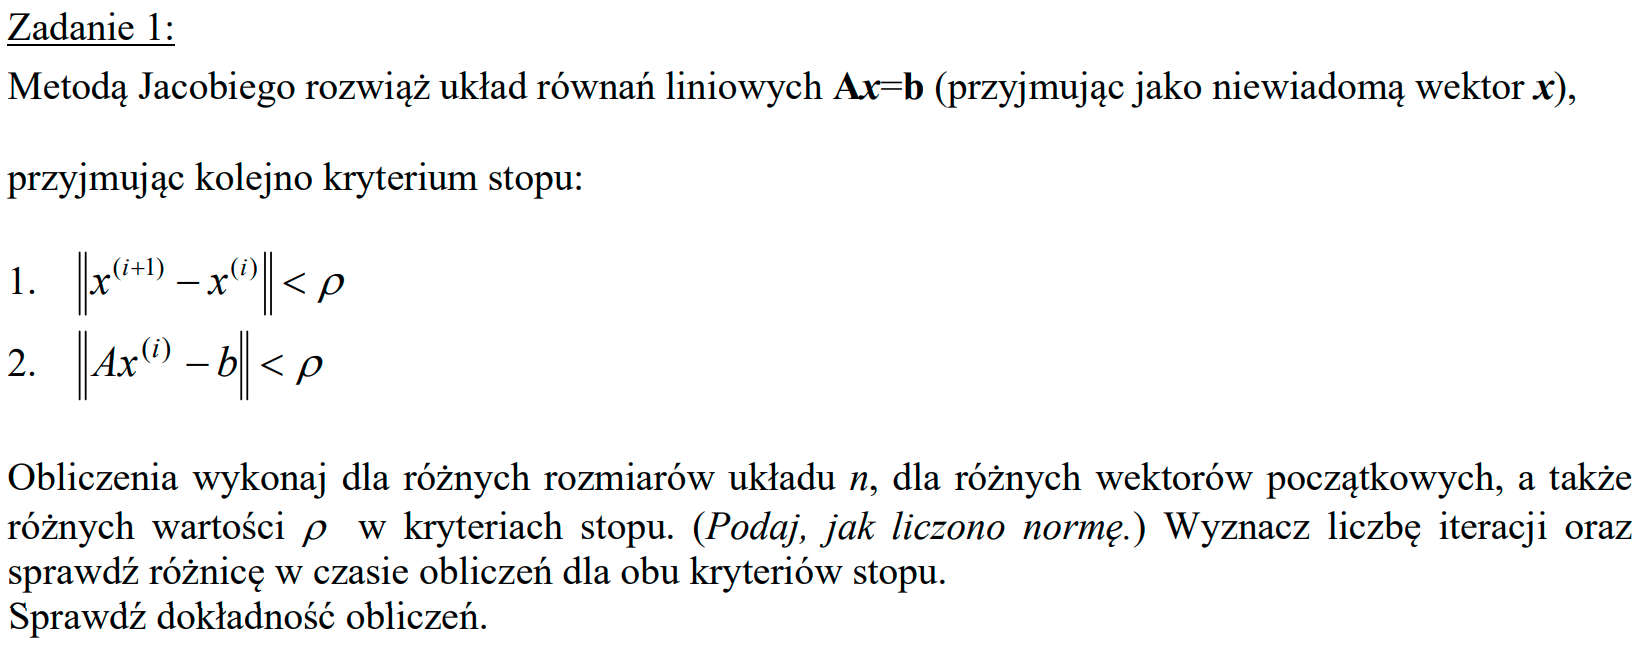

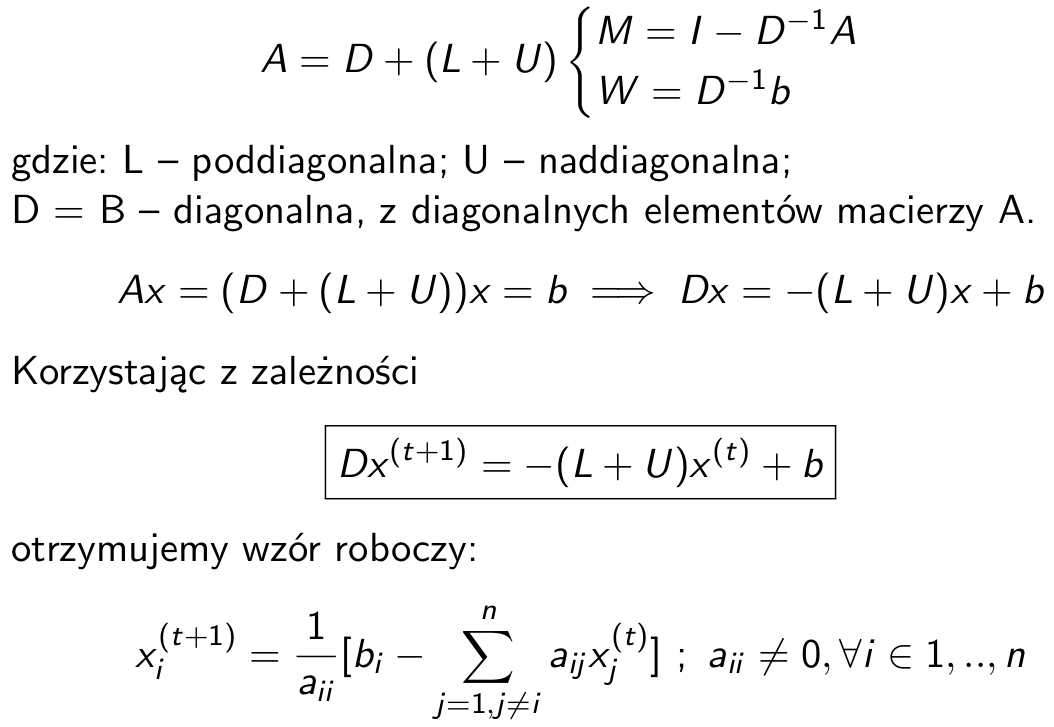

In [2]:
def jacobi_method(A, b, stop_cond, epsilon, max_iters):
    D = np.diag(A)
    R = A - np.diagflat(D)
    X = np.zeros_like(b)
    iters = 0
    for _ in range(max_iters):
        X_new = (b - (R @ X)) / D
        iters += 1
        if stop_cond == 1 and np.linalg.norm(X_new - X) < epsilon:
            break
        elif stop_cond == 2 and np.linalg.norm(A @ X - b) < epsilon:
            break
        X = X_new
    return X, iters

In [3]:
def exercise_1(numbers, epsilon, k, m, max_iters):
    result = []
    for n in numbers:
        A = np.array([[k if i == j else m / (n - i - j + 0.5) for j in range(n)] for i in range(n)])
        X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
        b = A @ X_vec
        # stop condition 1
        start = perf_counter()
        X, first_iters = jacobi_method(A, b, 1, epsilon, max_iters)
        end = perf_counter()
        first_time = end - start
        first_norm = np.linalg.norm(X_vec - X)

        # stop condition 2
        start = perf_counter()
        X, second_iters = jacobi_method(A, b, 2, epsilon, max_iters)
        end = perf_counter()
        second_time = end - start
        second_norm = np.linalg.norm(X_vec - X)

        result += [first_iters, second_iters, first_time, second_time, first_norm, second_norm]
    df = pd.DataFrame(data={"n": numbers,
                            "1st condition iters": result[::6],
                            "2nd condition iters": result[1::6],
                            "1st condition time [s]": result[2::6],
                            "2nd condition time [s]": result[3::6],
                            "1st condition norm": result[4::6],
                            "2nd condition norm": result[5::6]})
    return df

**epsilon 0.001**

In [4]:
numbers = [3, 4, 5, 7, 10, 12, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
epsilon = 0.001
df_1 = exercise_1(numbers, epsilon, 8, 2, 2000)
df_1

,n,1st condition iters,2nd condition iters,1st condition time [s],2nd condition time [s],1st condition norm,2nd condition norm
0,3,13,16,0.000809,0.000232,0.000497,0.000077
1,4,21,30,0.000258,0.000376,0.003552,0.000564
2,5,32,43,0.000372,0.000541,0.000979,0.000080
3,7,33,43,0.000396,0.000563,0.001268,0.000132
4,10,38,46,0.000446,0.000732,0.000499,0.000084
5,12,38,47,0.000520,0.000510,0.000518,0.000069
6,15,34,45,0.000323,0.000419,0.001473,0.000121
7,20,39,48,0.000329,0.000522,0.000523,0.000069
8,30,40,48,0.000360,0.000543,0.000496,0.000081
9,50,41,49,0.000472,0.000576,0.000489,0.000078


**epsilon 0.0001**

In [5]:
numbers = [3, 4, 5, 7, 10, 12, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
epsilon = 0.0001
df_1 = exercise_1(numbers, epsilon, 8, 2, 2000)
df_1

,n,1st condition iters,2nd condition iters,1st condition time [s],2nd condition time [s],1st condition norm,2nd condition norm
0,3,16,20,0.000267,0.000285,0.000077,0.000007
1,4,31,41,0.000376,0.000531,0.000460,0.000060
2,5,44,54,0.000533,0.000694,0.000064,0.000007
3,7,45,55,0.000535,0.000706,0.000085,0.000009
4,10,47,56,0.000547,0.000707,0.000068,0.000010
5,12,48,56,0.000658,0.000724,0.000055,0.000010
6,15,47,58,0.000555,0.000738,0.000078,0.000007
7,20,49,57,0.000561,0.000755,0.000055,0.000010
8,30,49,58,0.000625,0.000592,0.000065,0.000009
9,50,50,59,0.000465,0.000657,0.000062,0.000009


**epsilon 0.00001**

In [6]:
numbers = [3, 4, 5, 7, 10, 12, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
epsilon = 0.00001
df_1 = exercise_1(numbers, epsilon, 8, 2, 2000)
df_1

,n,1st condition iters,2nd condition iters,1st condition time [s],2nd condition time [s],1st condition norm,2nd condition norm
0,3,20,24,0.000252,0.000274,0.000007,6.562647e-07
1,4,42,52,0.000366,0.000507,0.000049,6.320114e-06
2,5,55,65,0.001673,0.000623,0.000006,7.139595e-07
3,7,56,67,0.000455,0.000632,0.000008,7.493839e-07
4,10,57,66,0.000534,0.000836,0.000008,1.274074e-06
5,12,57,66,0.000668,0.001158,0.000008,1.274633e-06
6,15,59,70,0.000527,0.000661,0.000006,6.681094e-07
7,20,58,67,0.000486,0.000630,0.000008,1.319218e-06
8,30,59,68,0.000500,0.000669,0.000008,1.246217e-06
9,50,60,69,0.000551,0.000743,0.000007,1.141625e-06


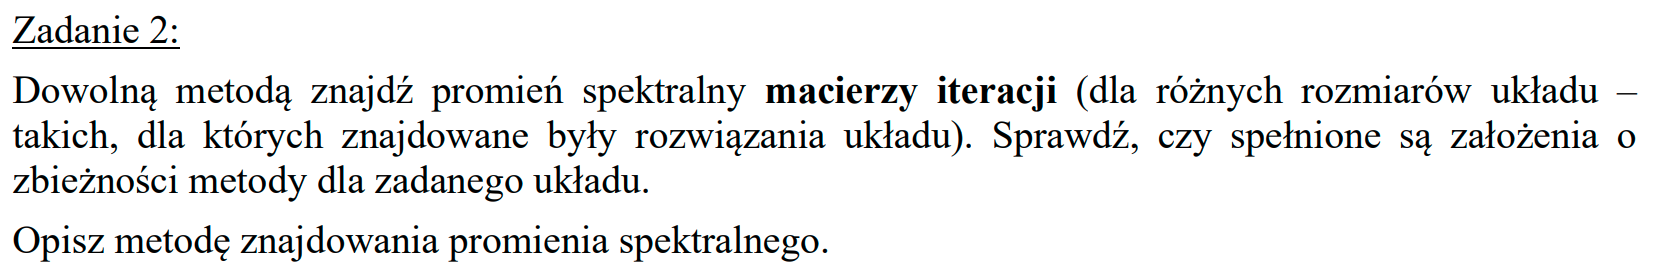

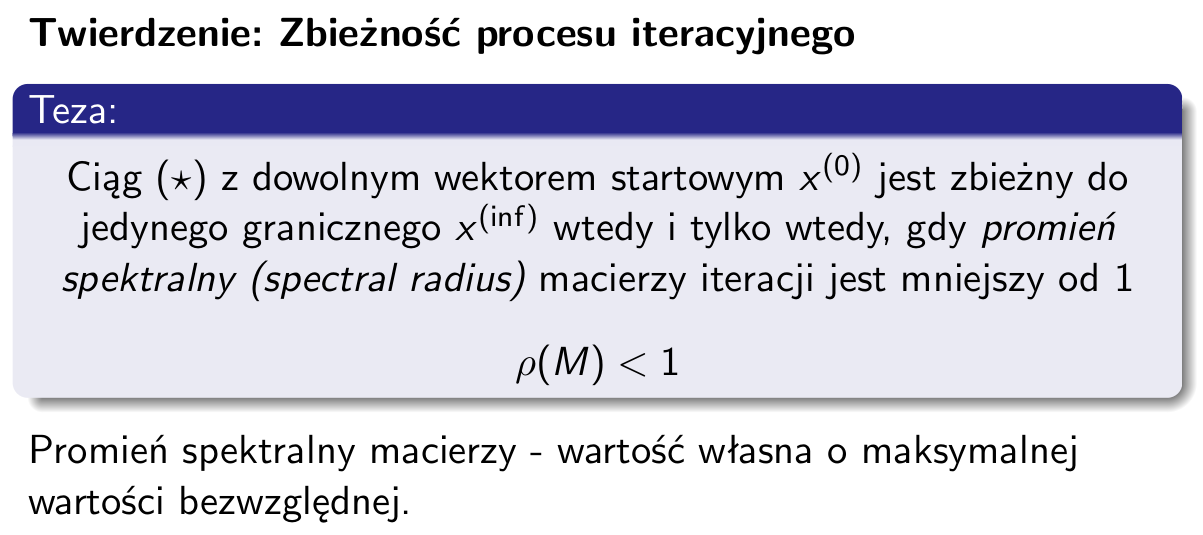

In [7]:
def spectral_radius(A):
    D = np.diag(A)
    R = A - np.diagflat(D)
    S = R / D
    eigvals = np.linalg.eigvals(S)
    return max(abs(i) for i in eigvals)

In [8]:
def exercise_2(numbers, k, m):
    result = []
    for n in numbers:
        A = np.array([[k if i == j else m / (n - i - j + 0.5) for j in range(n)] for i in range(n)], dtype=np.float64)
        spec_rad = spectral_radius(A)
        condition = True
        if spec_rad >= 1:
            condition = False
        result += [spec_rad, condition]
    df = pd.DataFrame(data={"n": numbers,
                            "spectral radius": result[::2],
                            "condition": result[1::2]})
    return df

In [9]:
numbers = [3, 4, 5, 7, 10, 12, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
df_2 = exercise_2(numbers, 8, 2)
df_2

,n,spectral radius,condition
0,3,0.563350,True
1,4,0.815332,True
2,5,0.817539,True
3,7,0.823404,True
4,10,0.826339,True
5,12,0.827641,True
6,15,0.829470,True
7,20,0.830267,True
8,30,0.831568,True
9,50,0.832585,True
